# Women's Clothing Ecommerce Sentiment Analysis

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that we need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, we will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if we want, we can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, we can start to know the data after doing the import and load operations.
we need to do missing value detection for Review Text, which is the only variable we need to care about. we can drop other variables.

we will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, we will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, we will build models with five different algorithms and compare their performance. Thus, we will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [95]:
!pip install wordcloud

In [96]:
!pip install imbalanced-learn

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import pickle

import warnings
warnings.simplefilter('ignore')

In [98]:
df0 = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df0.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [99]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [100]:
df0.shape

(23486, 11)

In [101]:
df0.dtypes

Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [102]:
df0.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [103]:
df0['Review Text'][3]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

#### Changing the datatype of "Review Text" to str

In [104]:
# Review Text has Object data type. This means that it can be mixed data
df0['Review Text'] = df0['Review Text'].astype(str)

In [105]:
df0['Rating'].unique()


array([4, 5, 3, 2, 1], dtype=int64)

In [106]:
df0['Recommended IND'].unique()

array([1, 0], dtype=int64)

#### Check Proportion of Target Class Variable:

In [107]:
df0['Recommended IND'].value_counts()

Recommended IND
1    19314
0     4172
Name: count, dtype: int64

In [108]:
df0["Recommended IND"].value_counts(normalize=True)

Recommended IND
1    0.822362
0    0.177638
Name: proportion, dtype: float64

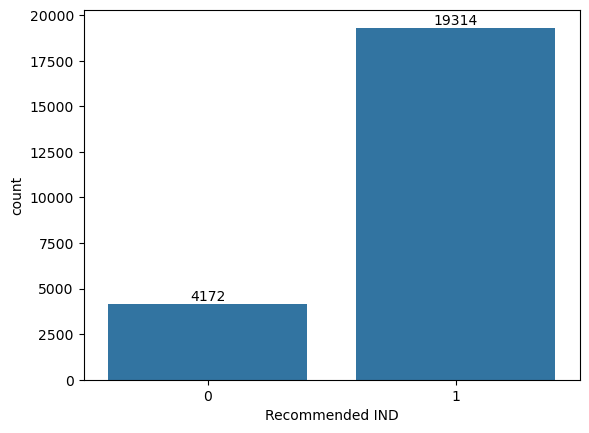

In [109]:
ax = sns.countplot(data=df0,
                   x="Recommended IND")
ax.bar_label(ax.containers[0]);


Our target variable is imbalanced. "Recommended" values are much more then "Not Recommended".

## 2. Feature Selection and Data Cleaning

We are going to use only two variables Review Text and Recommended IND as a predictor and target class variable.

**Review Text** is a review from customers and will be used as predictor variable.

**Recommended** is a recommendation from customers, where the product  1 is recommended, 0 is not recommended and  will be used as target variable.

### Feature Selection and Rename Column Name

In [110]:
df = df0[['Review Text', 'Recommended IND']]
df.head()

,Review Text,Recommended IND
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


In [111]:
df = df.rename(columns={"Recommended IND": "Class", "Review Text": "Review"})
df.head()

,Review,Class
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


#### Checking the text length for Recommended and Not Recommended values

In [112]:
df['length'] = df['Review'].apply(len)
df.head()

,Review,Class,length
0,Absolutely wonderful - silky and sexy and comf...,1,53
1,Love this dress! it's sooo pretty. i happene...,1,303
2,I had such high hopes for this dress and reall...,0,500
3,"I love, love, love this jumpsuit. it's fun, fl...",1,124
4,This shirt is very flattering to all due to th...,1,192


#### Histogram of text length

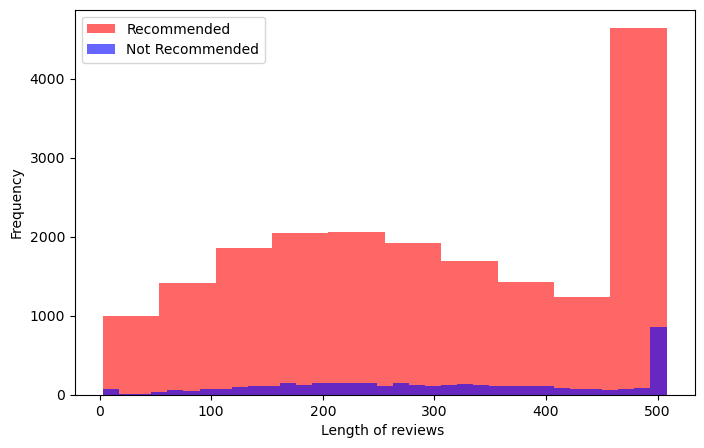

In [113]:
plt.figure(figsize=(8, 5))
df[df.Class == 1].length.plot(kind='hist', color='red', label='Recommended', alpha=0.6)
df[df.Class == 0].length.plot(bins=35, kind='hist', color='blue', label='Not Recommended', alpha=0.6)
plt.legend()
plt.xlabel("Length of reviews ");

---
---


### Missing Value Detection

In [114]:
df.isna().sum()

Review    0
Class     0
length    0
dtype: int64

In [115]:
df.dropna(subset=['Review'], inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  23486 non-null  object
 1   Class   23486 non-null  int64 
 2   length  23486 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 550.6+ KB


In [117]:
df.shape

(23486, 3)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [118]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

#### Stop words

We will first extract the stopwords from nltk library, then we will add some clothing stopwords to the list and build function to remove stop words:

In [119]:
# Show 10 stop words from the list
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [120]:
#clothing stopwords
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [121]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

#### Removing numbers (weight, size etc.)

We will remove the numbers from the text, since numbers doesn't help much to get the main words:

In [122]:
def remove_numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)        

#### Normalization

We will normalize the words by transforming all the different forms into one. There are two methods for this purpose: Stemming and Lemmatization. We will use  Lemmatization.

In [123]:
lem = WordNetLemmatizer()

def lemmatize(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

Apply all functions to data:

In [124]:
df['Review'] = df['Review'].apply(tokens)
df['Review'] = df['Review'].apply(stopwords)
df['Review'] = df['Review'].apply(remove_numbers)
df['Review'] = df['Review'].apply(lemmatize)

In [125]:
df.head()

,Review,Class,length
0,absolutely wonderful silky sexy comfortable,1,53
1,love sooo pretty happened find store glad bc n...,1,303
2,high hope really wanted work initially ordered...,0,500
3,love love love jumpsuit fun flirty fabulous ev...,1,124
4,flattering due adjustable front tie perfect le...,1,192


In [126]:
df['Review'][4]

'flattering due adjustable front tie perfect length legging sleeveless pair well cardigan love'

## 4. WordCloud - Repetition of Words

Now we'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

we are expected to create separate word clouds for positive and negative reviews. we can qualify a review as positive or negative, by looking at its recommended status. we may need to use capabilities of matplotlib for visualizations.

we can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [127]:
positive = df[df.Class == 1]
negative = df[df.Class == 0]
positive.head()

,Review,Class,length
0,absolutely wonderful silky sexy comfortable,1,53
1,love sooo pretty happened find store glad bc n...,1,303
3,love love love jumpsuit fun flirty fabulous ev...,1,124
4,flattering due adjustable front tie perfect le...,1,192
6,aded basket hte last mintue see would look lik...,1,496


In [128]:
negative.head()

,Review,Class,length
2,high hope really wanted work initially ordered...,0,500
5,love tracy reese dress one petite foot tall us...,0,488
10,run small esp zipper area run ordered sp typic...,0,336
22,first pullover styling side zipper purchased k...,0,437
25,loved didnt really look long purchased large m...,0,340


### Collect Words (positive and negative separately)

In [129]:
positive_words =[]

for review in positive.Review:
    positive_words.append(review) 
positive_words = ' '.join(positive_words)
positive_words[:15]

'absolutely wond'

In [130]:
negative_words = []

for review in negative.Review:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:138]

'high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medi'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

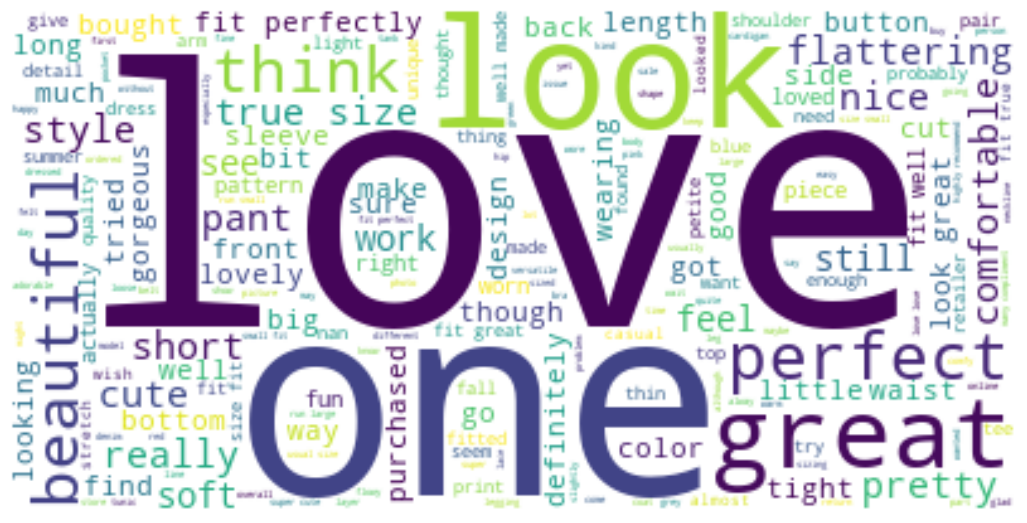

In [131]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

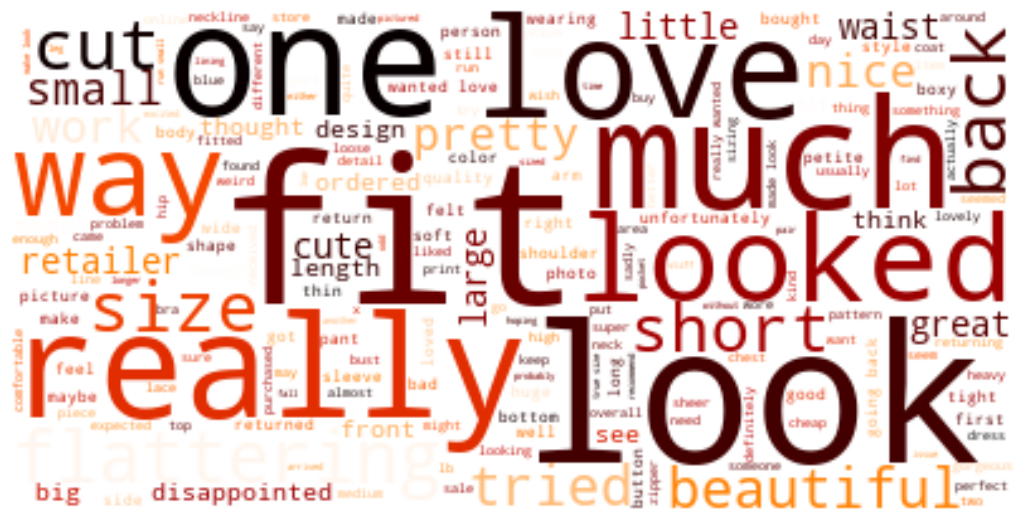

In [132]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps we will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. 

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that we will use here is to represent each text as a vector of word counts.

At this moment, we have our review text column as a token (which has no punctuations and stopwords). we can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. we can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build our models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

**SMOTE**

The target class variable is imbalanced. We will try to balance classes by using the technique called SMOTE (Synthetic Minority Over-sampling Technique).
The goal of the SMOTE method is to balance class distribution by randomly increasing minority class examples by replicating them.

**Pipeline**

vectorizer => transformer => SMOTE  => classifier

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [160]:
x = df['Review']
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [161]:
print(len(X_train))
print(len(X_test))

17614
5872


In [162]:
X_train

2774     much drapey flattering front part relatively s...
22308    love flattering thinner lightweight imaging gr...
3197     bought dark grey store really loved first soft...
6999     tried store immediately loved diaphanous inten...
18561    huge fan tracy reese dress work art great qual...
                               ...                        
13123    based photo thought would flattering hourglass...
19648       flattering suit embroidery unique cut flatters
9845     romper cute deny however rayon made really fee...
10799    great cut fit tt size fit pound frame b c bust...
2732     bought late august wearing ever since love eit...
Name: Review, Length: 17614, dtype: object

## Logistic Regression

### Pipeline: vectorizer => transformer => SMOTE  => classifier

In [136]:
model_log = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                               ('tfidf', TfidfTransformer()),
                               ('smote', SMOTE()),
                               ('clf', LogisticRegression())]) 

model_log.fit(X_train, y_train)

ytest = np.array(y_test)
predictions = model_log.predict(X_test)

In [137]:
print('accuracy %s' % accuracy_score(predictions, y_test))
print(classification_report(ytest, predictions))

accuracy 0.8833446866485014
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      1026
           1       0.95      0.90      0.93      4846

    accuracy                           0.88      5872
   macro avg       0.79      0.85      0.81      5872
weighted avg       0.90      0.88      0.89      5872



## Naive Bayes

### Pipeline: vectorizer => transformer => SMOTE  => classifier

In [138]:
model_nb = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                               ('smote', SMOTE()),
                               ('clf', MultinomialNB())]) 

model_nb.fit(X_train, y_train)

ytest = np.array(y_test)
pred_y = model_nb.predict(X_test)

In [139]:
print('accuracy %s' % accuracy_score(pred_y, y_test))
print(classification_report(ytest, pred_y))

accuracy 0.8663147138964578
              precision    recall  f1-score   support

           0       0.58      0.84      0.69      1026
           1       0.96      0.87      0.91      4846

    accuracy                           0.87      5872
   macro avg       0.77      0.86      0.80      5872
weighted avg       0.90      0.87      0.88      5872



## Support Vector Machine (SVM)

### Pipeline: vectorizer => transformer => SMOTE  => Scaler => classifier

SVM is a distance based model, the data needs to be scaled.

In [140]:
model_sg = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                              ('smote', SMOTE()),
                              ('scaler', StandardScaler(with_mean=False)),
                              ('clf',  SVC(kernel='linear', random_state=42))]) 


model_sg.fit(X_train, y_train)

ytest = np.array(y_test)
y_predict = model_sg.predict(X_test)

In [141]:
print('accuracy %s' % accuracy_score(y_predict, y_test))
print(classification_report(ytest, y_predict))

accuracy 0.8549046321525886
              precision    recall  f1-score   support

           0       0.59      0.58      0.58      1026
           1       0.91      0.91      0.91      4846

    accuracy                           0.85      5872
   macro avg       0.75      0.75      0.75      5872
weighted avg       0.85      0.85      0.85      5872



## Random Forest

### Pipeline: vectorizer => transformer => SMOTE  => classifier

In [142]:
model_rf = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                              ('tfidf', TfidfTransformer()),
                              ('smote', SMOTE()),
                              ('clf',  RandomForestClassifier(n_estimators=50))]) 


model_rf.fit(X_train, y_train)

ytest = np.array(y_test)
pred = model_rf.predict(X_test)

In [143]:
print('accuracy %s' % accuracy_score(pred, y_test))
print(classification_report(ytest, pred))

accuracy 0.8743188010899182
              precision    recall  f1-score   support

           0       0.70      0.50      0.58      1026
           1       0.90      0.95      0.93      4846

    accuracy                           0.87      5872
   macro avg       0.80      0.73      0.75      5872
weighted avg       0.86      0.87      0.87      5872



## Ada Boosting

### Pipeline: vectorizer => transformer => SMOTE  => classifier

In [144]:
ada = imbpipeline(steps=[('vect', CountVectorizer(min_df=5, ngram_range=(1, 2))),
                         ('tfidf', TfidfTransformer()),
                         ('smote', SMOTE()),
                         ('clf',  AdaBoostClassifier())]) 


ada.fit(X_train, y_train)

ytest = np.array(y_test)
ada_pred = ada.predict(X_test)

In [145]:
print('accuracy %s' % accuracy_score(ada_pred, y_test))
print(classification_report(ytest, ada_pred))

accuracy 0.8460490463215259
              precision    recall  f1-score   support

           0       0.56      0.60      0.58      1026
           1       0.91      0.90      0.91      4846

    accuracy                           0.85      5872
   macro avg       0.73      0.75      0.74      5872
weighted avg       0.85      0.85      0.85      5872



## DL modeling

### RNN

In [146]:
! pip install tensorflow

In [170]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, SimpleRNN

In [163]:
from nltk.corpus import stopwords
import string
df=df.dropna()

def text_process(review):
    wrd = [word for word in review if word not in string.punctuation]
    wrd = ''.join(wrd)
    return [word for word in wrd.split() if word.lower() not in stopwords.words('english')]

In [164]:
vectorizer = CountVectorizer(analyzer = text_process).fit(raw_documents = x)
x = vectorizer.transform(x)
x = x.toarray()

In [166]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [167]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(18788, 12118) (18788,) (4698, 12118) (4698,)


### Tokenization

In [171]:
samples = df["Review"].tolist()
maxlen = 100 
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
word_index = tokenizer.word_index
print('Found %s Unique Tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

Found 12133 Unique Tokens.


In [172]:
labels = np.asarray(df["Class"].values)
print('Data Tensor Shape :', data.shape)
print('Label Tensor Shape :', labels.shape)

Data Tensor Shape : (23486, 100)
Label Tensor Shape : (23486,)


### Creating word index

In [173]:
indices = np.arange(df.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [174]:
training_samples = 11743
validation_samples = 17614

In [175]:
x_train = data[:training_samples]
y_train = labels[:training_samples]

In [176]:
x_val = data[training_samples: validation_samples] 
y_val = labels[training_samples: validation_samples]

In [177]:
x_test = data[validation_samples:]
y_test = labels[validation_samples:]

In [178]:
x_train = pad_sequences(x_train, maxlen=maxlen)
x_val = pad_sequences(x_val, maxlen=maxlen)

### Modeling

In [179]:
def build_RNN():
    model = Sequential() 
    model.add(Embedding(max_words, 100, input_length=maxlen)) 
    model.add(SimpleRNN(32, return_sequences=True))
    model.add(SimpleRNN(32)) 
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
    return model

In [180]:
model = build_RNN()
model.summary()
history_RNN = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save("RNN.h5")

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - acc: 0.8302 - loss: 0.4084 - val_acc: 0.8799 - val_loss: 0.2924
Epoch 2/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - acc: 0.9138 - loss: 0.2217 - val_acc: 0.8820 - val_loss: 0.3075
Epoch 3/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - acc: 0.9603 - loss: 0.1187 - val_acc: 0.8712 - val_loss: 0.3838
Epoch 4/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - acc: 0.9848 - loss: 0.0549 - val_acc: 0.8457 - val_loss: 0.5281
Epoch 5/5
367/367 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - acc: 0.9913 - loss: 0.0331 - val_acc: 0.8602 - val_loss: 0.6211


### Model Evaluation

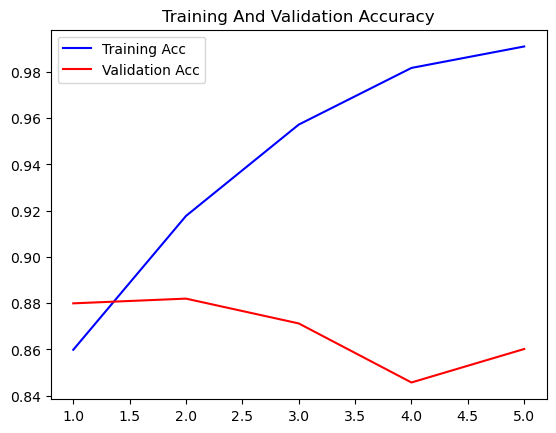

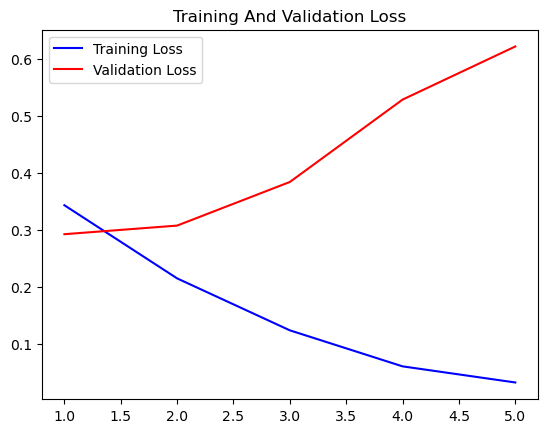

In [181]:
acc = history_RNN.history['acc']
val_acc = history_RNN.history['val_acc']
loss = history_RNN.history['loss']
val_loss = history_RNN.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training And Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training And Validation Loss')
plt.legend()
plt.show()

In [182]:
model.evaluate(x_test, y_test)

184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - acc: 0.8684 - loss: 0.5708


[0.621088445186615, 0.8595027327537537]

## BERT Modeling

In [183]:
!pip install transformers==4.37.2
# Since BERT models are based on transformers, we first install transformers to be able to use BERT models.

  Using cached transformers-4.37.2-py3-none-any.whl.metadata (129 kB)
  Using cached huggingface_hub-0.22.2-py3-none-any.whl.metadata (12 kB)
Using cached transformers-4.37.2-py3-none-any.whl (8.4 MB)
Using cached huggingface_hub-0.22.2-py3-none-any.whl (388 kB)
   ---------------------------------------- 0.0/287.3 kB ? eta -:--:--
   ------------ --------------------------- 92.2/287.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 287.3/287.3 kB 4.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.2 MB 13.8 MB/s eta 0:00:01
   ---------------- ----------------------- 0.9/2.2 MB 14.3 MB/s eta 0:00:01
   ------------------------- -------------- 1.4/2.2 MB 12.5 MB/s eta 0:00:01
   --------------------------------- ------ 1.9/2.2 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 11.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/172.0

### Read Data

### Train test split

### Tokenization

### Fixing token counts of all documents

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

### Batch Size

### Creating optimization

### Creating Model with TPU

### Model Fiting

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___